In [1]:
import math
#import imp_func
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [2]:
def cgc(j1,j2,m1,m2,j):
    m=m1+m2
    if (j<=j1+j2 and j>=abs(j1-j2) and abs(m)<=abs(j) and abs(m1)<=abs(j1) and abs(m2)<=abs(j2)):
        k=0
        sum=0.0
    
        cbcoeff=math.sqrt(((2*j+1)*factorial(int(j+j1-j2))*factorial(int(j-j1+j2))*factorial(int(j1+j2-j)))/factorial(int(j1+j2+j+1)))
        cbcoeff=cbcoeff*math.sqrt(factorial(int(j+m))*factorial(int(j-m))*factorial(int(j1-m1))*factorial(int(j1+m1))*factorial(int(j2-m2))*factorial(int(j2+m2)))
        for k in np.arange(max(-j+j2-m1,j1+m2-j,0),min(j1+j2-j,j1-m1,j2+m2)+1,1):
        #while (j1+j2-j-k)>=0 and (j1-m1-k)>=0 and (j2+m2-k)>=0 and (j-j2+m1+k)>=0 and (j-j1-m2+k)>=0 and k<10:
            sum=sum+pow((-1),k)*(pow(factorial(int(k))*factorial(int(j1+j2-j-k))*factorial(int(j1-m1-k))*factorial(int(j2+m2-k))*factorial(int(j-j2+m1+k))*factorial(int(j-j1-m2+k)),-1))
            #print([j,m,m1,m2,sum*cbcoeff])
        return sum*cbcoeff
    else:
        return 0

In [3]:
""" # Fermi-Dirac distribution
T_list = [0.01, 0.1, 0.5, 1.0]
lam = 1

for T in T_list:
    n = []
    e = []
    for i in range(50):
        e_value = i/10
        e.append(e_value)
        n.append(1/(1+math.exp((e_value-lam)/T)))
    plt.plot(e,n)
plt.show """

' # Fermi-Dirac distribution\nT_list = [0.01, 0.1, 0.5, 1.0]\nlam = 1\n\nfor T in T_list:\n    n = []\n    e = []\n    for i in range(50):\n        e_value = i/10\n        e.append(e_value)\n        n.append(1/(1+math.exp((e_value-lam)/T)))\n    plt.plot(e,n)\nplt.show '

In [4]:
def function1(A, delta_list, N_max):    
    Energy = []
    kap = 0.05
    mu = [0,0,0,0.35,0.625,0.63,0.448,0.434]
    for N in range (N_max+1):
        for i in range (N+1):
            om = i+0.5
            l_list = []
            lam_list = []
            sig_list = []
            H = []

            # Calculate basis for given value of N and om

            for l in range (N,-1,-2):
                for lam in range (-l, l+1):
                    sig = om - lam
                    if (abs(abs(sig)-0.5)<0.001):
                        l_list.append(l)
                        lam_list.append(lam)
                        sig_list.append(sig)

            # Calculate the hamiltonian matrix, <i|H|j>

            nbas = len(l_list)
            for delta in delta_list:
                H.append([])
                fdel = ((((1+2*delta/3)**(2))*(1-4*delta/3))**(-1/6))
                hw00 = 41*(A**(-1/3))
                #hw00 = 1
                hw0 = hw00*fdel
                C = -kap*2*hw00
                D = C*mu[N]/2.0
                for i in range(nbas):
                    H[-1].append([])
                    li = l_list[i]
                    lami = lam_list[i]
                    sigi = sig_list[i]
                    for j in range (nbas):
                        lj = l_list[j]
                        lamj = lam_list[j]
                        sigj = sig_list[j]

                        if (i==j):
                            h00 = (N+1.5)*hw0
                            hl2 = D*lj*(lj+1)
                            hls = C*lamj*sigj
                            hr2 = N+1.5
                        else:
                            h00 = 0
                            hl2 = 0
                        if (abs(li-lj)<0.001):
                            if (abs(lami-lamj-1)<0.001)and (abs(sigi-sigj+1)<0.001):
                                hls = C*0.5*math.sqrt((lj-lamj)*(lj+lamj+1))
                            elif (abs(lami-lamj+1)<0.001)and (abs(sigi-sigj-1)<0.001):
                                hls = C*0.5*math.sqrt((lj+lamj)*(lj-lamj+1))
                        else:
                            hls = 0
                        if (abs(lami-lamj)<0.001) and (abs(sigi-sigj)<0.001):
                            hY0 = cgc(lj, 2, lamj, 0, li)*cgc(lj, 2, 0, 0, li)*math.sqrt((2*lj+1)/(2*li+1))
                            if (abs(li-lj+2)<0.001):
                                hr2 = math.sqrt((N-lj+2)*(N+lj+1))
                            elif (abs(li-lj-2)<0.001):
                                hr2 = math.sqrt((N-lj)*(N+lj+3))
                        else:
                            hr2 = 0
                            hY0 = 0
                        hdelta = -delta*hw0*(2/3)*hr2*hY0
                        H[-1][-1].append(h00+hdelta+hls+hl2)
                        
            # Diagonalise H

            diagH = []
            diagHs = []
            for i in range (len(H)):
                P, diag = Matrix(H[i]).diagonalize()
                diagHs.append(sorted(np.diagonal(diag).tolist()))
            diagHs = np.array(diagHs)

            for i in range(len(l_list)):
                y = diagHs[:,i].tolist()
                Energy.append(y)
    return Energy

In [5]:
""" def G(x,y, Energies, Np, T):
    flag = 1
    s = y
    return s, flag """

' def G(x,y, Energies, Np, T):\n    flag = 1\n    s = y\n    return s, flag '

In [6]:
""" def J(x,y, Energies, Np, T):
    s1 = 0
    s2 = 0
    s3 = 0
    s4 = 1
    flag = 1
    for i in range(Np):
        ek = Energies[i]
        temp = (x-ek)/(2*T)
        s1 = s1 + 1/(T*(math.exp(temp)+math.exp(-temp))**2)
    return [[s1, s2], [s3, s4]], flag """

' def J(x,y, Energies, Np, T):\n    s1 = 0\n    s2 = 0\n    s3 = 0\n    s4 = 1\n    flag = 1\n    for i in range(Np):\n        ek = Energies[i]\n        temp = (x-ek)/(2*T)\n        s1 = s1 + 1/(T*(math.exp(temp)+math.exp(-temp))**2)\n    return [[s1, s2], [s3, s4]], flag '

In [7]:
Z = 40
A = 84
delta_list = [0.2]
N_max = 7
Energy = function1(A, delta_list, N_max)
Energy = np.array(Energy)

N = A - Z
hw0 = 41*(A**(-1/3))

Energies = sorted(Energy[:,0])
print(len(Energies))
#Energies

120


[14.1833633440607,
 22.2051432019711,
 23.8012226920420,
 24.9104508262902,
 30.2347829078392,
 31.7486702264507,
 32.9783437333672,
 33.4190820400234,
 34.6473895735831,
 35.5388183355858,
 36.8625565998179,
 37.9137857907160,
 39.3572411211743,
 39.8004947616594,
 41.0709721285988,
 41.5403529507919,
 41.8429862471964,
 41.9307636841289,
 42.4919645290150,
 43.5461205596547,
 43.6016375555559,
 44.1702034558253,
 44.5636398239076,
 45.0612296237613,
 45.6966637700661,
 46.8037017496587,
 47.0353518916165,
 47.3428261874805,
 47.5026497462499,
 47.9968794221708,
 48.8019083932857,
 48.9012664377426,
 49.3061232727681,
 50.1413725725968,
 50.6797893427847,
 50.8678500331704,
 51.5789503609077,
 51.6627513483578,
 52.3181869519112,
 53.2296454654501,
 53.4257984166404,
 53.6517977511568,
 53.7245568788104,
 53.8856638584740,
 54.6500408876161,
 55.2759211617554,
 55.9507245530532,
 56.4008902760056,
 56.4144875614053,
 57.1644364130417,
 57.2172084022606,
 57.2209522120803,
 58.34225230

In [8]:
# Defining Function
def f(x, T,Ener=Energies, Np=44):
    s = 0
    #flag = 1
    for i in range(len(Ener)):
        ek = Ener[i]
        dr = 1 + math.exp((ek-x)/T)
        s = s + 1/dr
    s = s - Np
    return s

# Defining derivative of function

def g(x, T,Ener=Energies, Np=40):
    s = 0
    #flag = 1
    for i in range(Np):
        ek = Ener[i]
        s = s+ 1/(4*T*((math.cosh((x-ek)/(2*T)))**2))
    return s
# Implementing Newton Raphson Method

def newtonRaphson(x0,T,N):
    #print('\n\n*** NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    step = 1
    flag = 1
    e=0.001
    eta=0.1
    condition = True
    while condition:
        #if g(x0,T) == 0.0:
        #    print('Divide by zero error!')
        #    break
        
        x1 = x0 - eta*f(x0,T)/g(x0,T)
        #print('Iteration-%d, x1 = %0.6f and f(x1) = %0.6f' % (step, x1, f(x1)))
        x0 = x1
        step = step + 1
        
        if step > N:
            flag = 0
            break
        
        condition = abs(f(x1,T)) > e
    
    if flag==1:
        return x1
    else:
        print('\n Not Convergent.')



C:\Users\Manish Prasad\AppData\Local\Temp\ipykernel_7420\1680339346.py:18: RuntimeWarning: divide by zero encountered in log
  s.append(-( n[-1]*np.log(n[-1]) + (1-n[-1])*np.log(1-n[-1]) ))
C:\Users\Manish Prasad\AppData\Local\Temp\ipykernel_7420\1680339346.py:18: RuntimeWarning: invalid value encountered in double_scalars
  s.append(-( n[-1]*np.log(n[-1]) + (1-n[-1])*np.log(1-n[-1]) ))


Text(0.5, 0, '$e_{i}\\; MeV$')

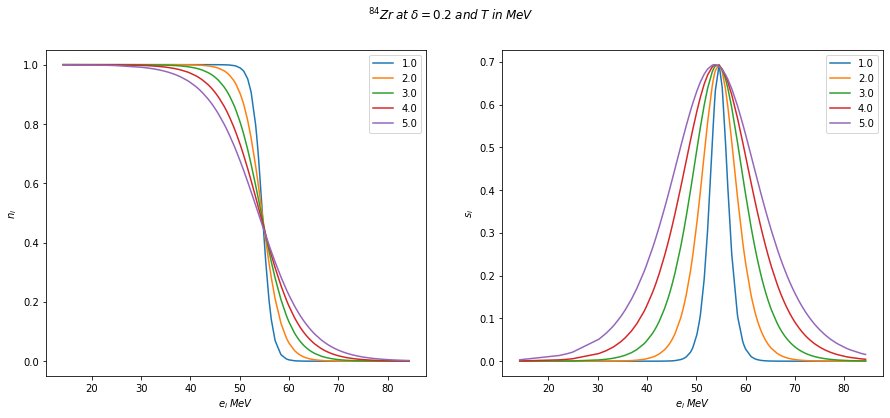

In [9]:
# Fermi-Dirac including particle number

#T_list = [0.01, 0.1, 0.5, 1.0]
T_list = [1.0,2.0,3.0,4.0,5.0]
#T_list=[0.1,0.2,0.3,0.4,0.5]
#plt.figure(figsize=(20,8))
fig, (ax1, ax2) =  plt.subplots(1,2, figsize=(15, 6))
fig.suptitle(r'$^{84}Zr \; at\; \delta = 0.2\; and\; T\; in\; MeV$')
#plt.figure(figsize=(20,8))
for T in T_list:
    n = []
    s=[]
    x0 = 44#Energies[19]
    Np = len(Energies)
    lam= newtonRaphson(x0, T,100)
    for i in range(Np):
        n.append(1/(1+math.exp((Energies[i]-lam)/T)))
        s.append(-( n[-1]*np.log(n[-1]) + (1-n[-1])*np.log(1-n[-1]) ))

    ax1.plot(Energies,n,label='{}'.format(T))
    ax2.plot(Energies,s,label='{}'.format(T))
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax1.set_ylabel(r'$n_{i}$')
ax2.set_ylabel(r'$s_{i}$')
ax1.set_xlabel(r'$e_{i}\; MeV$')
ax2.set_xlabel(r'$e_{i}\; MeV$')
#plt.axhline(0.5)

In [10]:
""" T_list=np.linspace(0.5,5,15)
Lam=[]
for T in T_list:
    n = []
    x0 = 44#Energies[19]
    Np = len(Energies)
    lam= newtonRaphson(x0, T,100)
    Lam.append(lam)
plt.plot(T_list,Lam) """

' T_list=np.linspace(0.5,5,15)\nLam=[]\nfor T in T_list:\n    n = []\n    x0 = 44#Energies[19]\n    Np = len(Energies)\n    lam= newtonRaphson(x0, T,100)\n    Lam.append(lam)\nplt.plot(T_list,Lam) '

C:\Users\Manish Prasad\AppData\Local\Temp\ipykernel_7420\4006728312.py:17: RuntimeWarning: divide by zero encountered in log
  s.append(-( n[-1]*np.log(n[-1]) + (1-n[-1])*np.log(1-n[-1]) ))
C:\Users\Manish Prasad\AppData\Local\Temp\ipykernel_7420\4006728312.py:17: RuntimeWarning: invalid value encountered in double_scalars
  s.append(-( n[-1]*np.log(n[-1]) + (1-n[-1])*np.log(1-n[-1]) ))


Text(0.5, 0, '$T\\; MeV$')

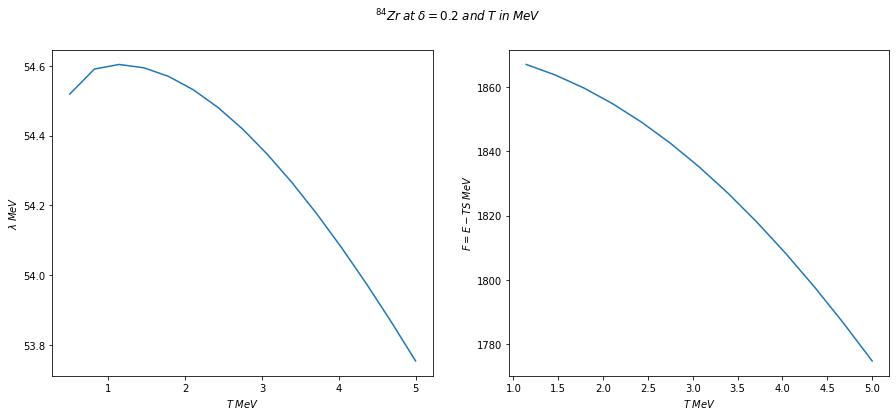

In [12]:
T_list=np.linspace(0.5,5,15)
Lam=[]
F = []
Energies = np.array(Energies)

fig, (ax1, ax2) =  plt.subplots(1,2, figsize=(15, 6))
fig.suptitle(r'$^{84}Zr \; at\; \delta = 0.2\; and\; T\; in\; MeV$')
for T in T_list:
    n = []
    s = []
    x0 = 44#Energies[19]
    Np = len(Energies)
    lam= newtonRaphson(x0, T,100)
    Lam.append(lam)
    for i in range(Np):
        n.append(1/(1+math.exp((Energies[i]-lam)/T)))
        s.append(-( n[-1]*np.log(n[-1]) + (1-n[-1])*np.log(1-n[-1]) ))
    n=np.array(n)
    s=np.array(s)
    S = np.sum(s)
    Etotal = np.dot((Energies.T),n)
    F.append(Etotal - T*S)
#plt.plot(T_list,Lam)
#plt.plot(T_list,F)

ax1.plot(T_list,Lam)
ax2.plot(T_list,F)

ax1.set_ylabel(r'$\lambda\; MeV$')
ax2.set_ylabel(r'$F=E-TS\; MeV$')
ax1.set_xlabel(r'$T\; MeV$')
ax2.set_xlabel(r'$T\; MeV$')